# Compare Time Measuring Methods 
The following code measures and displays the elapesed time of complete program run versus elapsed time of algorithm only. In addition the speed up is calculated. 

## Which program do you want to test ?

In the following code line, replace the last word `pi` with the program name you want to test. Then run all the code lines (and be patient). 

These are your options:
- pi
- jacobi
- fibonacci
- findprime
- mandelbrot
- quicksort
- mergesort
- bubblesort
- selectionsort
- matrixmultiplication

You can also test your own program. Check the readme file to find out how to do this.

In [1]:
cd ~/work/Thesis/programs/mandelbrot

/home/jovyan/work/Thesis/programs/mandelbrot


In [2]:
# of full programm run: measure time
time1 = []
threads = [1,4,8,16,24,32,48,64]
timeit_object = %timeit -o -n 10 -r 1 -q ! ./notiming.o 1 >/dev/null
time1.append(timeit_object.best)
timeit_object = %timeit -o -n 10 -r 1 -q ! ./notiming.o 4 >/dev/null
time1.append(timeit_object.best) 
timeit_object = %timeit -o -n 10 -r 1 -q ! ./notiming.o 8 >/dev/null
time1.append(timeit_object.best) 
timeit_object = %timeit -o -n 10 -r 1 -q ! ./notiming.o 16 >/dev/null
time1.append(timeit_object.best)
timeit_object = %timeit -o -n 10 -r 1 -q ! ./notiming.o 24 >/dev/null
time1.append(timeit_object.best)
timeit_object = %timeit -o -n 10 -r 1 -q ! ./notiming.o 32 >/dev/null
time1.append(timeit_object.best)
timeit_object = %timeit -o -n 10 -r 1 -q ! ./notiming.o 48 >/dev/null
time1.append(timeit_object.best)
timeit_object = %timeit -o -n 10 -r 1 -q ! ./notiming.o 64 >/dev/null
time1.append(timeit_object.best)

In [3]:
# of algorithm only: measure time
import numpy as np
time2 = []
threads = [1,4,8,16,24,32,48,64]
! ./timing.o 1 >/dev/null
time2.append(np.genfromtxt('./time.txt'))
! ./timing.o 4 >/dev/null
time2.append(np.genfromtxt('./time.txt'))
! ./timing.o 8 >/dev/null
time2.append(np.genfromtxt('./time.txt'))
! ./timing.o 16 >/dev/null
time2.append(np.genfromtxt('./time.txt'))
! ./timing.o 24 >/dev/null
time2.append(np.genfromtxt('./time.txt'))
! ./timing.o 32 >/dev/null
time2.append(np.genfromtxt('./time.txt'))
! ./timing.o 48 >/dev/null
time2.append(np.genfromtxt('./time.txt'))
! ./timing.o 64 >/dev/null
time2.append(np.genfromtxt('./time.txt'))

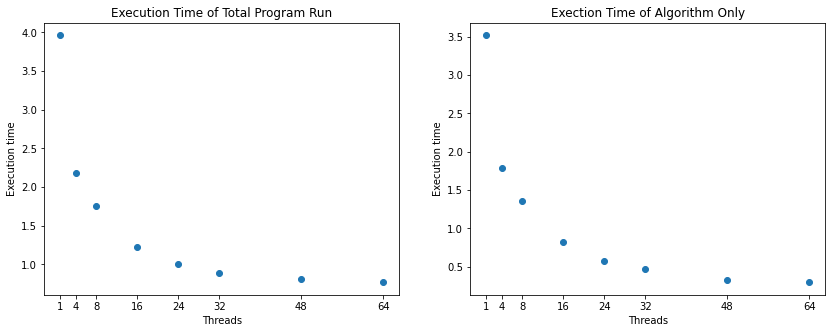

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# plot
fig,ax = plt.subplots(1,2,figsize=(14,5))
ax[0].scatter(threads,time1)
ax[0].set_xticks(threads)
ax[0].set_xticklabels(threads)
ax[0].set_ylabel('Execution time')
ax[0].set_xlabel('Threads')
ax[0].set_title('Execution Time of Total Program Run')
ax[1].scatter(threads,time2)
ax[1].set_xticks(threads)
ax[1].set_xticklabels(threads)
ax[1].set_ylabel('Execution time')
ax[1].set_xlabel('Threads')
ax[1].set_title('Exection Time of Algorithm Only');

Let's also plot the execution time as a bar diagram. This allows us to directly compare the absolute execution time difference:

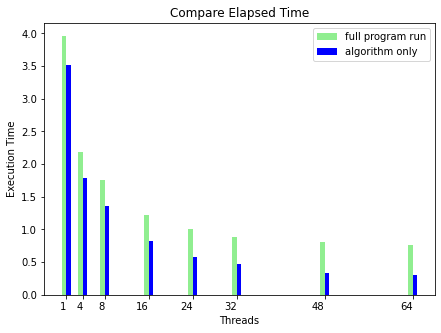

In [5]:
#plot
fig,ax = plt.subplots(figsize=(7,5))
ax.bar(np.array(threads)-0.4,time1,color='lightgreen',label='full program run', align='center', width= 0.8)
ax.bar(np.array(threads)+0.4,time2,color='blue',label='algorithm only',align='center', width= 0.8)
ax.set_xticks(threads)
ax.set_xticklabels(threads, ha='right')
ax.set_ylabel('Execution Time')
ax.set_xlabel('Threads')
ax.set_title('Compare Elapsed Time')
ax.legend();

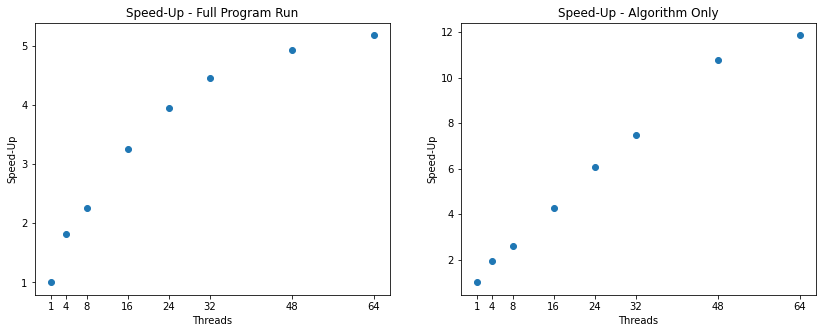

In [6]:
# calculate speed up
speedup1 = np.ones(len(threads))*time1[0]/np.array(time1)
speedup2 = np.ones(len(threads))*time2[0]/np.array(time2)

# plot
fig,ax = plt.subplots(1,2,figsize=(14,5))
ax[0].scatter(threads,speedup1)
ax[0].set_xticks(threads)
ax[0].set_xticklabels(threads)
ax[0].set_ylabel('Speed-Up')
ax[0].set_xlabel('Threads')
ax[0].set_title('Speed-Up - Full Program Run')
ax[1].scatter(threads,speedup2)
ax[1].set_xticks(threads)
ax[1].set_xticklabels(threads)
ax[1].set_ylabel('Speed-Up')
ax[1].set_xlabel('Threads')
ax[1].set_title('Speed-Up - Algorithm Only');

Let's also plot the speed-up as a bar diagram. This allows us to directly compare the values:

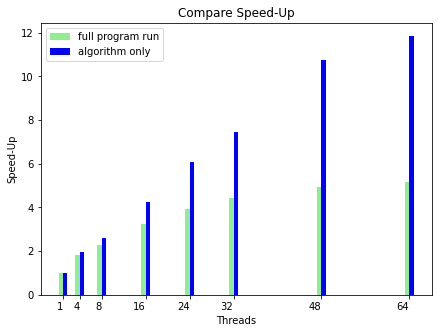

In [7]:
#plot
fig,ax = plt.subplots(figsize=(7,5))
ax.bar(np.array(threads)-0.4,speedup1,color='lightgreen',label='full program run', align='center', width= 0.8)
ax.bar(np.array(threads)+0.4,speedup2,color='blue',label='algorithm only',align='center', width= 0.8)
ax.set_xticks(threads)
ax.set_xticklabels(threads, ha='right')
ax.set_ylabel('Speed-Up')
ax.set_xlabel('Threads')
ax.set_title('Compare Speed-Up')
ax.legend();